# Week-4 Capstone Project: Parking lots in Toronto neighbourhoods

#### Incase if we want the dataset of parking lots in Toronto from toronto open source. Since i have already downloaded the dataset as .xlsx format, so we are going to use this data set for this entire project

### Problem definition:
***
Since the evolution started mankind wants to have a better living standards, as their needs are increasing in day-to-day life, people are expected to fulfil them in one way or another. As we see everyday transportation became very big issue to reach from one place to another. Modernisation dragging the people to all major cities for better work opportunity and life style, cities like those are facing traffic and parking issues. To resolve these issues, need to develop infrastructure better than yesterday. Other than the traffic issue, we are going to focus on parking problem in all the densely crowded places inside Toronto city.

The specific reason behind taking Toronto city under consideration is that we have a client, who wants to have a new parking lot for public and to generate an income of source from it. But, he is not sure about his location in Toronto where to build it. He has set of preferences for an ideal location. It has to be near to busiest neighbourhood (but away from the other public parking lots or where there are less parking lots available than the need), where there is a parking problem. In such a way he can make some income out of this project. 


Parking space features: These are the features our client wants have in his parking lot. So, using these features will help to know exactly where he can have one.

Normal- more than 200
Handicap- 10 to 15 


### Data Description:
----------------------
In order to initialise the first step, we need the data about existing parking lots in Toronto city. This data we are importing from ckan opensource website (parking_lots_info_2016), this data downloaded to internal pc memory in xlsx format.
The data is not the current information, these statistics were recorded in the year 2016.

This imported file has a data about parking lot name, available places, GIS coordinates of the location where they are located in Toronto, type of the parking lot (private/ public). By the help of geocoder framework in python we can extract the neighbourhoods of parking lots, where they were located by using those GIS coordinates.


In [275]:
# packages using in this notebook
import sys
import pandas as pd
import requests
from sklearn.cluster import KMeans
#geocoder for using reverese methodology to get address from coordinates
from geopy.geocoders import Nominatim
#folium packaging importing
import folium
import json
#scatter plot packages
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cm as cm
import matplotlib.colors as colors

#### If in case you want to test it on your own, here is the xlsx file for open data of parking lots in Toronto

In [276]:
# Get the dataset metadata by passing package_id to the package_search endpoint
# For example, to retrieve the metadata for this dataset:

#url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
#params = { "id": "5c56aef2-dd4a-4e4a-9f2e-d3722622b7e6"}
#package = requests.get(url, params = params)
#print(package["result"])

In [277]:
data1= pd.read_excel("parking-lot-facilities-q3-2016.xlsx")
data1= data1.dropna(axis=0)
data1

,Parking Lot Asset ID,Park Name,Parking Spaces,Handicap Parking Spaces,GIS Coordinate,Access
0,32202,ADAMS PARK,134.0,6.0,"(-79.1447873015202,43.7924791844875)",Public
1,32203,AGINCOURT PARK,300.0,9.0,"(-79.2751862118817,43.7877827155571)",Public
2,32524,ALBION ARENA - Building Grounds,118.0,10.0,"(-79.5818486224219,43.7394116555141)",Public
3,32204,ALLAN A. LAMPORT STADIUM PARK,360.0,3.0,"(-79.4231327178795,43.6381423188339)",Public
4,32205,ALLAN GARDENS,6.0,2.0,"(-79.3748943065984,43.6615560937226)",Public
...,...,...,...,...,...,...
432,32505,WEXFORD PARK,27.0,1.0,"(-79.2974278112541,43.73364378318)",Public
433,32514,WHITFIELD PARKETTE,14.0,1.0,"(-79.5717808953673,43.7589574299948)",Public
436,32507,WISHING WELL PARK,92.0,1.0,"(-79.3153477649206,43.7696162307164)",Public
437,32509,WOODBINE BEACH PARK,80.0,3.0,"(-79.3086144392198,43.6633189030861)",Public


In [278]:
#removing park name and parking lot asset id from dataframe
data1= data1.drop(['Parking Lot Asset ID'], axis=1)
data1

,Park Name,Parking Spaces,Handicap Parking Spaces,GIS Coordinate,Access
0,ADAMS PARK,134.0,6.0,"(-79.1447873015202,43.7924791844875)",Public
1,AGINCOURT PARK,300.0,9.0,"(-79.2751862118817,43.7877827155571)",Public
2,ALBION ARENA - Building Grounds,118.0,10.0,"(-79.5818486224219,43.7394116555141)",Public
3,ALLAN A. LAMPORT STADIUM PARK,360.0,3.0,"(-79.4231327178795,43.6381423188339)",Public
4,ALLAN GARDENS,6.0,2.0,"(-79.3748943065984,43.6615560937226)",Public
...,...,...,...,...,...
432,WEXFORD PARK,27.0,1.0,"(-79.2974278112541,43.73364378318)",Public
433,WHITFIELD PARKETTE,14.0,1.0,"(-79.5717808953673,43.7589574299948)",Public
436,WISHING WELL PARK,92.0,1.0,"(-79.3153477649206,43.7696162307164)",Public
437,WOODBINE BEACH PARK,80.0,3.0,"(-79.3086144392198,43.6633189030861)",Public


In [279]:
# removing all non-public parking lots from dataframe
data = data1[data1['Access']== "Public"]
data.dtypes

Park Name                   object
Parking Spaces             float64
Handicap Parking Spaces    float64
GIS Coordinate              object
Access                      object
dtype: object

In [280]:
#converting GIS Coordinates to two different Lattitude & Longitude
Longitude= []
Latitude= []
for i in data["GIS Coordinate"]:
    gis= i.split(',')
    Longitude.append(gis[0][1:])
    Latitude.append(gis[1][:-1])
    
data['Latitude']= Latitude
data['Longitude']= Longitude
data= data.drop(['GIS Coordinate', 'Access'],1)

#since the customer is interested in bigger parking lots. we are going to filter the dataframe to see all the parking 
#with more than 100 parking spaces
#data= data[data['Parking Spaces']>= 100]
data.reset_index(drop=True,inplace=True)


data.tail(8)

<ipython-input-280-6ea8c6cbc615>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Latitude']= Latitude
<ipython-input-280-6ea8c6cbc615>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Longitude']= Longitude


,Park Name,Parking Spaces,Handicap Parking Spaces,Latitude,Longitude
262,WEST ROUGE PARK,157.0,3.0,43.7918343377395,-79.125748588514
263,WESTON LIONS PARK,112.0,0.0,43.6982776559218,-79.5190025986134
264,WESTWAY PARK,43.0,1.0,43.6882302233167,-79.5416256119935
265,WEXFORD PARK,27.0,1.0,43.73364378318,-79.2974278112541
266,WHITFIELD PARKETTE,14.0,1.0,43.7589574299948,-79.5717808953673
267,WISHING WELL PARK,92.0,1.0,43.7696162307164,-79.3153477649206
268,WOODBINE BEACH PARK,80.0,3.0,43.6633189030861,-79.3086144392198
269,WOODBINE BEACH PARK,230.0,3.0,43.6627340511553,-79.311290992215


In [281]:
data.reset_index(drop=True,inplace=True)


data.tail(8)
#print(data.shape)

,Park Name,Parking Spaces,Handicap Parking Spaces,Latitude,Longitude
262,WEST ROUGE PARK,157.0,3.0,43.7918343377395,-79.125748588514
263,WESTON LIONS PARK,112.0,0.0,43.6982776559218,-79.5190025986134
264,WESTWAY PARK,43.0,1.0,43.6882302233167,-79.5416256119935
265,WEXFORD PARK,27.0,1.0,43.73364378318,-79.2974278112541
266,WHITFIELD PARKETTE,14.0,1.0,43.7589574299948,-79.5717808953673
267,WISHING WELL PARK,92.0,1.0,43.7696162307164,-79.3153477649206
268,WOODBINE BEACH PARK,80.0,3.0,43.6633189030861,-79.3086144392198
269,WOODBINE BEACH PARK,230.0,3.0,43.6627340511553,-79.311290992215


In [282]:
#creating a list for both latitude and longitude
l= list(data.loc[:,"Latitude"])
m= list(data.loc[:, "Longitude"])
print(f'----------we are extracting all the neighbourhoods Latitude, Longitude-----------')

----------we are extracting all the neighbourhoods Latitude, Longitude-----------


In [283]:
#extracting all the neighbourhoods of respective parking lot coordinates
Neighbourhood= []
for lat,long in zip(l,m):
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.reverse([lat,long])
    pl_neigh = (location.address)
    pl_neigh = pl_neigh.split(",")[2]

    Neighbourhood.append(pl_neigh)
print(f'we are saving the Neighbourhood names in a list')

we are saving the Neighbourhood names in a list


In [284]:
data["Neighbourhood"]= Neighbourhood
data

,Park Name,Parking Spaces,Handicap Parking Spaces,Latitude,Longitude,Neighbourhood
0,ADAMS PARK,134.0,6.0,43.7924791844875,-79.1447873015202,Centennial
1,AGINCOURT PARK,300.0,9.0,43.7877827155571,-79.2751862118817,Glen Watford Drive
2,ALBION ARENA - Building Grounds,118.0,10.0,43.7394116555141,-79.5818486224219,Beaumonde Heights
3,ALLAN A. LAMPORT STADIUM PARK,360.0,3.0,43.6381423188339,-79.4231327178795,Little Tibet
4,ALLAN GARDENS,6.0,2.0,43.6615560937226,-79.3748943065984,Horticultural Avenue
...,...,...,...,...,...,...
265,WEXFORD PARK,27.0,1.0,43.73364378318,-79.2974278112541,Scarborough Centre
266,WHITFIELD PARKETTE,14.0,1.0,43.7589574299948,-79.5717808953673,Islington Avenue
267,WISHING WELL PARK,92.0,1.0,43.7696162307164,-79.3153477649206,Sullivan
268,WOODBINE BEACH PARK,80.0,3.0,43.6633189030861,-79.3086144392198,The Beaches


### After thorough analysis and observation of the existing parking lots surrounded by venues in those neighbourhoods. It makes sense to mark the Parking lots below 100 places in a different colour to see them easily.

In [285]:
address = 'Toronto, Ontario' # giving Toronto 

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

park_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for p_spaces, lat, lon, park_name, neighbourhood in zip(data["Parking Spaces"], data["Latitude"], data["Longitude"], data["Park Name"], data["Neighbourhood"]):
    label= '{}, {}'.format(park_name, neighbourhood)
    label = folium.Popup(label, parse_html=True)
    if p_spaces >100:
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(park_map)
    else:
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color='green',
            fill=True,
            fill_color='#15B01A',
            fill_opacity=0.8,
            parse_html=False).add_to(park_map)

park_map

## Now proceeding with Foursquare

In [286]:
CLIENT_ID = 'MNFDPG0GYFTSELF24FSOLJCSSHJY5O03O3M1PP5LBEV0X5LW' # your Foursquare ID
CLIENT_SECRET = '1GGFO1ECKDHFJD1NIVWQTTTMQHFJBLGHOW1L4BRZ0QUUTIJL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MNFDPG0GYFTSELF24FSOLJCSSHJY5O03O3M1PP5LBEV0X5LW
CLIENT_SECRET:1GGFO1ECKDHFJD1NIVWQTTTMQHFJBLGHOW1L4BRZ0QUUTIJL


### Creating a funcion to get all the venues in those neighbourhoods where the parking-lots are located

In [287]:
radius = 150 # SEARCH RADIUS TO 150M
LIMIT = 50 # LIMITING THE NUMBER OF VENUES TO 50
def getNearbyVenues(names, latitudes, longitudes, radius=150):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [288]:
#to get venues near to all the parking lots, in all neighbourhoods
venues= getNearbyVenues(data['Neighbourhood'], data['Latitude'], data['Longitude'])
venues

 Centennial
 Glen Watford Drive
 Beaumonde Heights
 Little Tibet
 Horticultural Avenue
 York South—Weston
 York South—Weston
 Mimico By-The-Lake
 York Centre
 Grenoble Drive
 Annette Street
 York Centre
 Ridley Boulevard
 Old Toronto
 The Bridle Path
 Covington Road
 Neptune Drive
 Bayview Avenue
 The Peanut
 Scarborough North
 Etobicoke—Lakeshore
 Birchcliff
 Birchcliff
 Scarborough Centre
 Scarborough Centre
 Scarborough Centre
 Scarborough Centre
 Scarborough Southwest
 Scarborough
 Scarborough
 Scarborough Southwest
 Scarborough Southwest
 Don Valley East
 Orton Park Road
 Castlegrove Boulevard
 Don Valley East
 Old Toronto
 Pharmacy Avenue
 Eglinton—Lawrence
 York
 Parkway East
 Woburn
 Upper Guild
 Arlington Avenue
 Etobicoke Centre
 Eringate
 Rathburn Road
 Rathburn Road
 Eringate
 Centennial Park Road
 Eringate
 Etobicoke Centre
 North York
 Old Toronto
 Toronto—Danforth
 Toronto—Danforth
 Cloverdale
 Scarborough
 Scarborough
 The Lakeshore Grounds
 Scarborough North
 Scarborou

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Centennial,43.7924791844875,-79.1447873015202,Adam's Park,43.791570,-79.144967,Park
1,Glen Watford Drive,43.7877827155571,-79.2751862118817,One2 Snacks,43.787048,-79.276658,Asian Restaurant
2,Glen Watford Drive,43.7877827155571,-79.2751862118817,Global Imperial Cuisine 國寶軒,43.786719,-79.274382,Cantonese Restaurant
3,Glen Watford Drive,43.7877827155571,-79.2751862118817,Fisherman Villa 褔臨門,43.787108,-79.275931,Hong Kong Restaurant
4,Glen Watford Drive,43.7877827155571,-79.2751862118817,Grand Ocean Restaurant,43.786933,-79.274230,Restaurant
...,...,...,...,...,...,...,...
448,Old Toronto,43.6627340511553,-79.311290992215,Athens Pastries Cafe,43.662826,-79.309910,Bakery
449,Old Toronto,43.6627340511553,-79.311290992215,Beach Volleyball,43.662505,-79.309703,Beach
450,Old Toronto,43.6627340511553,-79.311290992215,Tim Hortons,43.662644,-79.309945,Coffee Shop
451,Old Toronto,43.6627340511553,-79.311290992215,Breakfast Club,43.662811,-79.310174,Breakfast Spot


In [289]:
venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Centennial,43.7924791844875,-79.1447873015202,Adam's Park,43.791570,-79.144967,Park
1,Glen Watford Drive,43.7877827155571,-79.2751862118817,One2 Snacks,43.787048,-79.276658,Asian Restaurant
2,Glen Watford Drive,43.7877827155571,-79.2751862118817,Global Imperial Cuisine 國寶軒,43.786719,-79.274382,Cantonese Restaurant
3,Glen Watford Drive,43.7877827155571,-79.2751862118817,Fisherman Villa 褔臨門,43.787108,-79.275931,Hong Kong Restaurant
4,Glen Watford Drive,43.7877827155571,-79.2751862118817,Grand Ocean Restaurant,43.786933,-79.274230,Restaurant


In [290]:
count = venues.Neighbourhood
count.shape
print(f'There are {len(venues["Neighbourhood"].unique())} no of Neighbourhoods with {len(venues["Venue"].unique())} different venues.')

There are 123 no of Neighbourhoods with 372 different venues.


In [291]:
address = 'Toronto, Ontario' # giving Toronto 

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

#venue_map = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lon, park_name, neighbourhood in zip(venues["Venue Latitude"], venues["Venue Longitude"], venues["Venue"], venues["Neighbourhood"]):
    label= '{}, {}'.format(park_name, neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='turquoise',
        fill=True,
        fill_color='#06C2AC',
        fill_opacity=1.0,
        parse_html=False).add_to(park_map)

park_map#.add_child(venue_map)

#### In the above map: 
|Colour|    Place     |
|------|--------------|
| Blue | Parking-lots > 100|
| Green | Parking-lots <= 100|
|Turquoise|Venues in that Neighbourhood| 


From the above map, we can visualise the data regarding parking lots spread across Toronto city. From the above map, where there are more venues with less Praviate parking space like in Moss Park, those places are the potential locations for the investors to open/develope the parking lot with more spaces than already exisiting ones.

## Creating a new dataframe for Kmean clustering

In [292]:
v = venues.groupby("Neighbourhood").count()
v["Neighbourhood Latitude"]
Neighbourhood = list(v["Neighbourhood Latitude"])
Neighbourhood = pd.DataFrame({'Neighbourhood': venues.Neighbourhood.unique()})
Neighbourhood


,Neighbourhood
0,Centennial
1,Glen Watford Drive
2,Beaumonde Heights
3,Little Tibet
4,Horticultural Avenue
...,...
118,Weston
119,Richview
120,Islington Avenue
121,Sullivan


In [293]:
vc = venues.groupby("Neighbourhood").size().reset_index(name='no.of.venues')

vc

,Neighbourhood,no.of.venues
0,Agincourt North,1
1,Albion Road,3
2,Alton Towers Circle,2
3,Annette Street,4
4,Arlington Avenue,2
...,...,...
118,Willowdale,4
119,Woodbine Heights,7
120,York,1
121,York Centre,9


In [294]:
# this gone be our main df for k mean clustering, to this we are going to add parking lots data
Neighbourhood_vc = pd.merge(Neighbourhood, vc, on = 'Neighbourhood')

Neighbourhood_vc

,Neighbourhood,no.of.venues
0,Centennial,1
1,Glen Watford Drive,4
2,Beaumonde Heights,2
3,Little Tibet,8
4,Horticultural Avenue,4
...,...,...
118,Weston,2
119,Richview,1
120,Islington Avenue,2
121,Sullivan,2


In [295]:
data_c = data.groupby("Neighbourhood").size().reset_index(name='no of parkinglots')
data_c

,Neighbourhood,no of parkinglots
0,Agincourt North,1
1,Albion Road,1
2,Alton Towers Circle,2
3,Annette Street,1
4,Arlington Avenue,1
...,...,...
134,Woburn,1
135,Woodbine Heights,2
136,York,2
137,York Centre,8


In [296]:
Neighbourhood_vc = pd.merge(Neighbourhood_vc, data_c, on = 'Neighbourhood')
#Neighbourhood_vc = Neighbourhood_vc.drop('no of parkinglots_y', 1)
Neighbourhood_vc

,Neighbourhood,no.of.venues,no of parkinglots
0,Centennial,1,1
1,Glen Watford Drive,4,1
2,Beaumonde Heights,2,1
3,Little Tibet,8,1
4,Horticultural Avenue,4,1
...,...,...,...
118,Weston,2,1
119,Richview,1,2
120,Islington Avenue,2,1
121,Sullivan,2,1


In [297]:
N_latitude= []
N_longitude= []
for i in Neighbourhood_vc['Neighbourhood']:

    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(f'{i}, Ontario')
    N_latitude.append(location.latitude)
    N_longitude.append(location.longitude)
    


In [298]:
print(N_latitude,  N_longitude )
print(f'size of lat {len(N_latitude)} , long {len(N_longitude)} are equal as Neighbourhood_vc')


[43.8738256, 43.7907319, 43.7417506, 43.6389445, 43.6611263, 43.6844658, 43.6157701, 43.750241, 43.7160711, 43.6585038, 45.3678891, 43.6534817, 43.7353996, 43.720901, 45.1387875, 44.0006329, 43.7840694, 43.6046194, 43.697007, 43.7475018, 43.7010356, 43.7729744, 43.749187, 43.7305734, 43.7192647, 43.7553381, 43.7516581, 45.4062753, 43.6798327, 43.6544643, 43.6622732, 44.5578927, 43.7543263, 43.6789439, 43.633637, 43.5947531, 43.8099025, 43.7618571, 43.6845715, 43.6913738, 43.7338206, 43.6462843, 43.7337368, 43.6968049, 43.699971000000005, 43.7750911, 43.8083627, 43.6864103, 43.6799548, 43.69992, 43.7131819, 43.7760748, 43.7275183, 43.6869597, 43.7025981, 43.7727842, 43.7228033, 43.6499649, 43.695689, 43.7185995, 43.7184315, 43.7122937, 43.7174221, 43.7523702, 43.8266826, 43.7795251, 43.7920164, 43.7000842, 43.6510909, 43.7518017, 43.6664717, 43.8080383, 43.6487442, 43.7359904, 43.7053973, 43.6901578, 43.7720571, 43.8161778, 43.7967785, 43.8072404, 43.799003, 42.934736, 43.7047983, 43.82

Joining two new columns to `Neighbourhood_vc` df `N_latitude` &`N_longitude`

In [299]:
Neighbourhood_vc["N_latitude"] = N_latitude
Neighbourhood_vc["N_longitude"] = N_longitude
Neighbourhood_vc

,Neighbourhood,no.of.venues,no of parkinglots,N_latitude,N_longitude
0,Centennial,1,1,43.873826,-79.288858
1,Glen Watford Drive,4,1,43.790732,-79.278160
2,Beaumonde Heights,2,1,43.741751,-79.573754
3,Little Tibet,8,1,43.638945,-79.427312
4,Horticultural Avenue,4,1,43.661126,-79.374920
...,...,...,...,...,...
118,Weston,2,1,43.700161,-79.516247
119,Richview,1,2,43.688589,-79.542847
120,Islington Avenue,2,1,43.716138,-79.555553
121,Sullivan,2,1,43.772680,-79.315945


Plotting a scatter plot of no of venues vs no of parking lots 

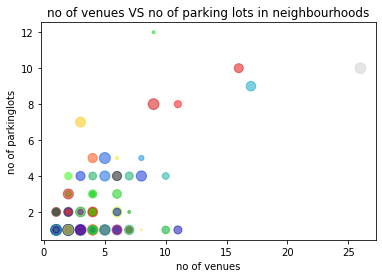

In [300]:
no_of_venues = np.array([Neighbourhood_vc['no.of.venues']])
no_of_parkinglots = np.array([Neighbourhood_vc['no of parkinglots']])

colors = np.random.randint(no_of_parkinglots.shape[1], size=no_of_parkinglots.shape[1])
sizes = np.random.randint(no_of_parkinglots.shape[1], size=no_of_parkinglots.shape[1])#1 * np.random.randint(np.max(no_of_parkinglots), size=(np.max(no_of_parkinglots)))

#plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='nipy_spectral')
plt.scatter(no_of_venues, no_of_parkinglots,c=colors, s=sizes, alpha=0.5, cmap='nipy_spectral')

plt.title('no of venues VS no of parking lots in neighbourhoods')
plt.xlabel('no of venues')
plt.ylabel('no of parkinglots')

plt.show()

In [301]:
from sklearn.cluster import KMeans


### Finding the suittable cluster size by running k means from 2 to 9

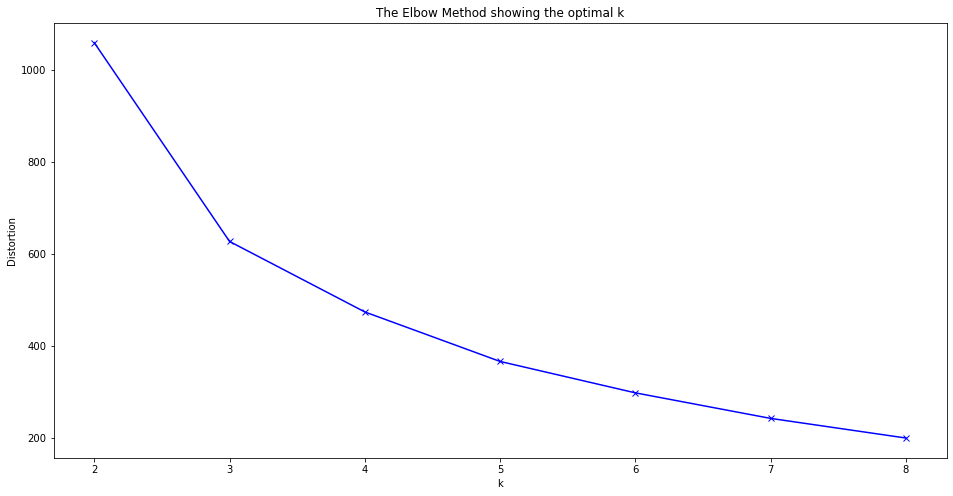

In [302]:
distortions = []
cluster_range= range(2,9)
for k in cluster_range:
    kmeans = KMeans(n_clusters= k).fit(Neighbourhood_vc.drop('Neighbourhood', axis=1))
    distortions.append(kmeans.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(cluster_range, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
    

From the elbow method of our model between the range of 2 to 9 clusters. we have a clear understanding that the cluster size of 4 would be the nice choice

In [303]:
'''kclusters = 5

kmeans = KMeans(n_clusters= kclusters, random_state=0).fit(Neighbourhood_vc.drop('Neighbourhood', axis=1))

cluster_labels= kmeans.labels_'''
cluster_labels = [0 4 0 4 2 4 4 1 0 2 2 3 0 4 0 4 4 1 4 4 0 4 4 0 0 0 4 2 4 0 1 2 4 2 2 2 0
 2 4 0 0 3 2 2 4 2 0 4 0 0 2 2 0 0 0 3 4 0 4 0 0 0 0 0 2 4 0 4 2 0 4 2 0 2
 4 2 0 0 2 0 4 0 0 4 0 0 2 4 0 0 0 0 2 0 4 0 2 4 0 0 2 0 2 0 0 0 0 2 0 0 2
 0 0 2 0 0 2 0 0 0 0 0 4]
print(cluster_labels)

SyntaxError: invalid syntax (<ipython-input-303-30d4fb75ff75>, line 6)

In [304]:
Neighbourhood_vc['cluster_labels']= cluster_labels
Neighbourhood_vc

,Neighbourhood,no.of.venues,no of parkinglots,N_latitude,N_longitude,cluster_labels
0,Centennial,1,1,43.873826,-79.288858,0
1,Glen Watford Drive,4,1,43.790732,-79.278160,4
2,Beaumonde Heights,2,1,43.741751,-79.573754,0
3,Little Tibet,8,1,43.638945,-79.427312,1
4,Horticultural Avenue,4,1,43.661126,-79.374920,4
...,...,...,...,...,...,...
118,Weston,2,1,43.700161,-79.516247,0
119,Richview,1,2,43.688589,-79.542847,0
120,Islington Avenue,2,1,43.716138,-79.555553,0
121,Sullivan,2,1,43.772680,-79.315945,0


In [188]:
cl_0= []
cl_1= []
cl_2= []
cl_3= []
cl_4= []
for n,nv,np,cl in zip(Neighbourhood_vc.Neighbourhood,
                      Neighbourhood_vc["no.of.venues"],
                      Neighbourhood_vc["no of parkinglots"], 
                      Neighbourhood_vc.cluster_labels):
    if cl == 0:
        cl_0.append(cl)
        #print(f"Neighbourhoods infor for cluster 0: {n}, {nv}, {np}")
    elif cl == 1:
        cl_1.append(cl)
        #print(f"Neighbourhoods infor for cluster 1: {n}, {nv}, {np}")
    elif cl == 2:
        cl_2.append(cl)
        #print(f"Neighbourhoods infor for cluster 1: {n}, {nv}, {np}")
    elif cl == 3:
        cl_3.append(cl)
    else:
        cl_4.append(cl)
        #print(f"Neighbourhoods infor for cluster 2: {n}, {nv}, {np}")
        
print(len(cl_0))
print(len(cl_1))
print(len(cl_2))
print(len(cl_3))
print(len(cl_4))




59
3
29
3
29


### Report
------------
|Cluster|Description|
| :-----------: | :-----------: |
|5|It has maximum number of Parking lots and Venues|
|^|^|
|^|^|
|0|It has minimum number of Parking lots and Venues|

### Discussion on K-means cluster classification
---------
As we have 3 clusters from K mean, each one describes the levels of 'no of venues' and 'no of parkinglots' in that neighbourhood available at the that time of data we are using for this data analysis(2016). As we see the results of 'cluster 2', it has three neighbourhoods with different proportions between venues and parkinglots. So, it is clear by now this classification is not yet clear to make a valid decision for our client. To go further we need to see deeply into each cluster and know the preportions of veneus and parkinglots distribution among them. 

Further analysis it is time to make different data frames for each cluster and, observe them more closely by plotting the venues and parkinglots information.

### Creating new dataframes for clusters_0,1,2

In [190]:
d= {'name':[],
    'no of venues':[],
    'no of parking lots':[]}
Cl_0= pd.DataFrame(d)
Cl_1= pd.DataFrame(d)
Cl_2= pd.DataFrame(d)
Cl_3= pd.DataFrame(d)
Cl_4= pd.DataFrame(d)

for n,nv,np,cl in zip(Neighbourhood_vc.Neighbourhood,
                      Neighbourhood_vc["no.of.venues"],
                      Neighbourhood_vc["no of parkinglots"], 
                      Neighbourhood_vc.cluster_labels):
    if cl == 0:
        new_row= {'name':n,
                  'no of venues':nv,
                  'no of parking lots':np}
        Cl_0 = Cl_0.append(new_row, ignore_index=True)
    elif cl == 1:
        new_row= {'name':n,
                  'no of venues':nv,
                  'no of parking lots':np}
        Cl_1 = Cl_1.append(new_row, ignore_index=True)
    elif cl == 2:
        new_row= {'name':n,
                  'no of venues':nv,
                  'no of parking lots':np}
        Cl_2 = Cl_2.append(new_row, ignore_index=True)
    elif cl == 3:
        new_row= {'name':n,
                  'no of venues':nv,
                  'no of parking lots':np}
        Cl_3 = Cl_3.append(new_row, ignore_index=True)
    else:
        new_row= {'name':n,
                  'no of venues':nv,
                  'no of parking lots':np}
        Cl_4 = Cl_2.append(new_row, ignore_index=True)


### Plotting data cluster wise starting from Cl_0

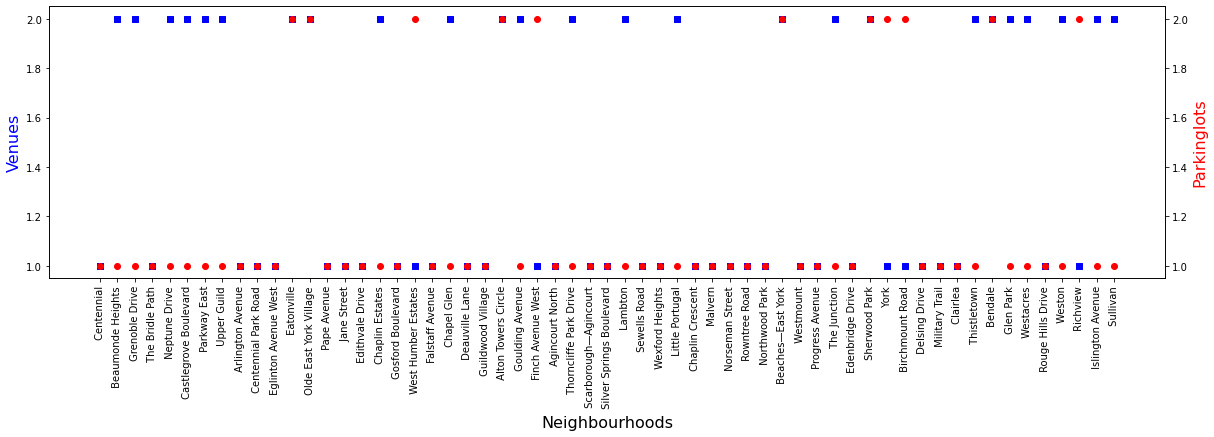

In [191]:
plt.figure(figsize=(20, 5))



plt.scatter(x = Cl_0['name'], y = Cl_0['no of venues'], c="b", marker= "s")
plt.xticks(rotation=90)
plt.xlabel("Neighbourhoods", fontsize= 16)
plt.ylabel("Venues", c="b", fontsize= 16)

ax2= plt.twinx()
ax2.scatter(x = Cl_0['name'], y = Cl_0['no of parking lots'], c="r", marker= "o")
plt.ylabel("Parkinglots", c="r", fontsize= 16)

plt.show()

### Cluster 0:
#### (Features scales between 1 to 2)
-----
As it is shown in the above scatter graph between "Venues vs Parkinglots" in 59 Neighbourhoods (who were clustered under Cl_0). There are very slightest differences between both venues and parkinglots for these 59 neighbourhoods. It disqualifies, as we are looking for the disproportion or very huge change between both features.

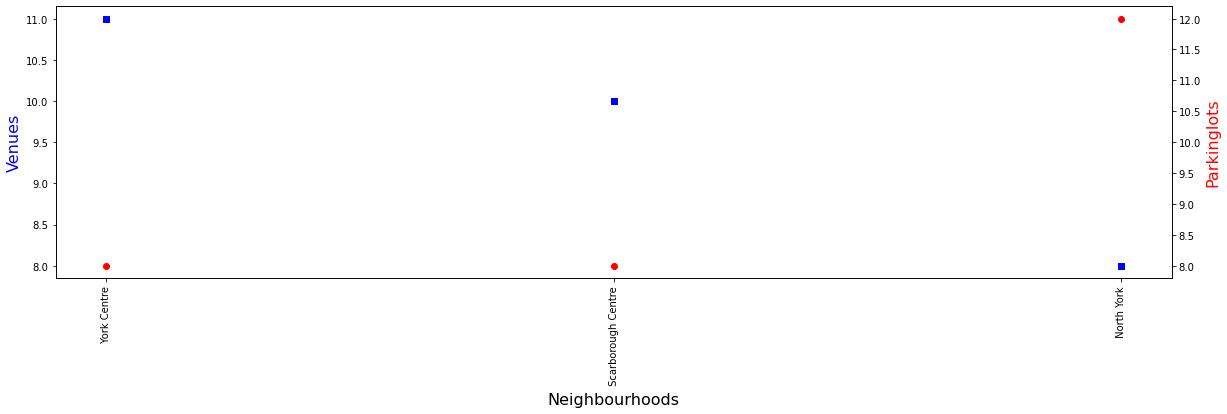

In [192]:
plt.figure(figsize=(20, 5))



plt.scatter(x = Cl_1['name'], y = Cl_1['no of venues'], c="b", marker= "s")
plt.xticks(rotation=90)
plt.xlabel("Neighbourhoods", fontsize= 16)
plt.ylabel("Venues", c="b", fontsize= 16)

ax2= plt.twinx()
ax2.scatter(x = Cl_1['name'], y = Cl_1['no of parking lots'], c="r", marker= "o")
plt.ylabel("Parkinglots", c="r", fontsize= 16)

plt.show()

### Cluster 1:
#### Features scaling between 8 to 11 for Venues and 8 to 12 for Parkinglots
-----
This cluster has not more interesting than the last one. May be consider taking `York Centre` for the final Neighbourhood short list. It has 11 venues with 8 parking lots. We have to see the other clusters for more information at this point. 

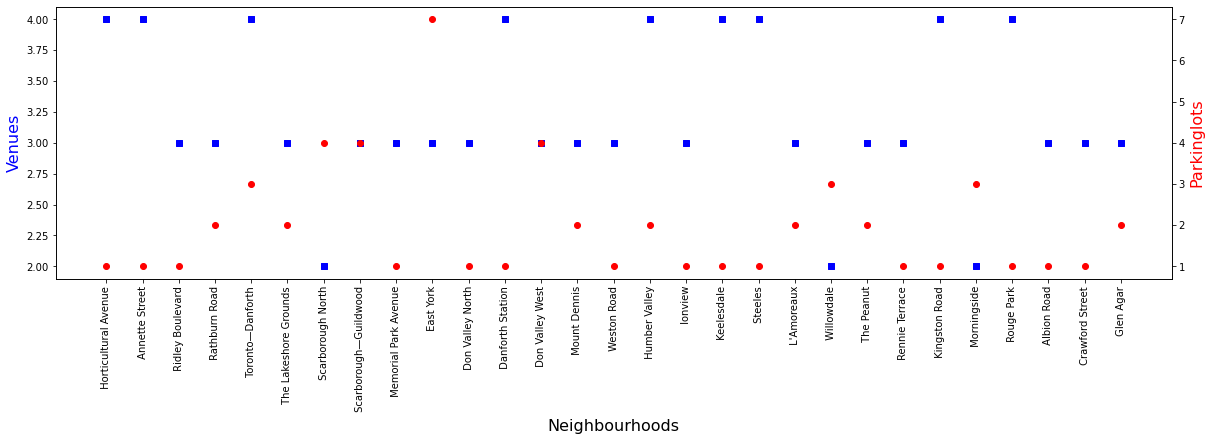

In [193]:
plt.figure(figsize=(20, 5))



plt.scatter(x = Cl_2['name'], y = Cl_2['no of venues'], c="b", marker= "s")
plt.xticks(rotation=90)
plt.xlabel("Neighbourhoods", fontsize= 16)
plt.ylabel("Venues", c="b", fontsize= 16)

ax2= plt.twinx()
ax2.scatter(x = Cl_2['name'], y = Cl_2['no of parking lots'], c="r", marker= "o")
plt.ylabel("Parkinglots", c="r", fontsize= 16)

plt.show()

### Cluster 2:
#### Features scaling between 2 to 4 for Venues and 1 to 7 for Parking lots
---
As we see above this cluster of neighbourhoods, there are some of them has disproportion in both features. We can take them into consideration for final short list of Neighboourhoods(7). Below table you can see them:

|Neighbourhood|Venues|Parkinglots|
|---|---|---|
|Horticultural Avenue|4|1|
|Annette Street|4|1|
|Danforth Station|4|1|
|Keelesdale|4|1|
|Steeles|4|1|
|Kingston Road|4|1|
|Rouge Park|4|1|

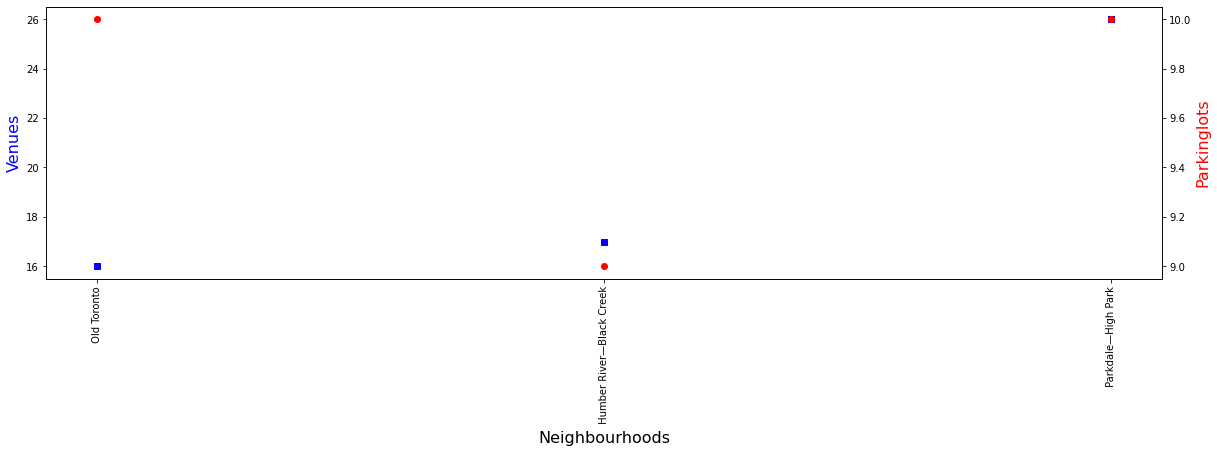

In [194]:
plt.figure(figsize=(20, 5))



plt.scatter(x = Cl_3['name'], y = Cl_3['no of venues'], c="b", marker= "s")
plt.xticks(rotation=90)
plt.xlabel("Neighbourhoods", fontsize= 16)
plt.ylabel("Venues", c="b", fontsize= 16)

ax2= plt.twinx()
ax2.scatter(x = Cl_3['name'], y = Cl_3['no of parking lots'], c="r", marker= "o")
plt.ylabel("Parkinglots", c="r", fontsize= 16)

plt.show()

### Cluster 3:
#### Features scaling between 16 to 26 for Venues and 9 to 10 for Parkinglots
---
All this Neighbourhoods qualify's the requirement to be in final shortlist.

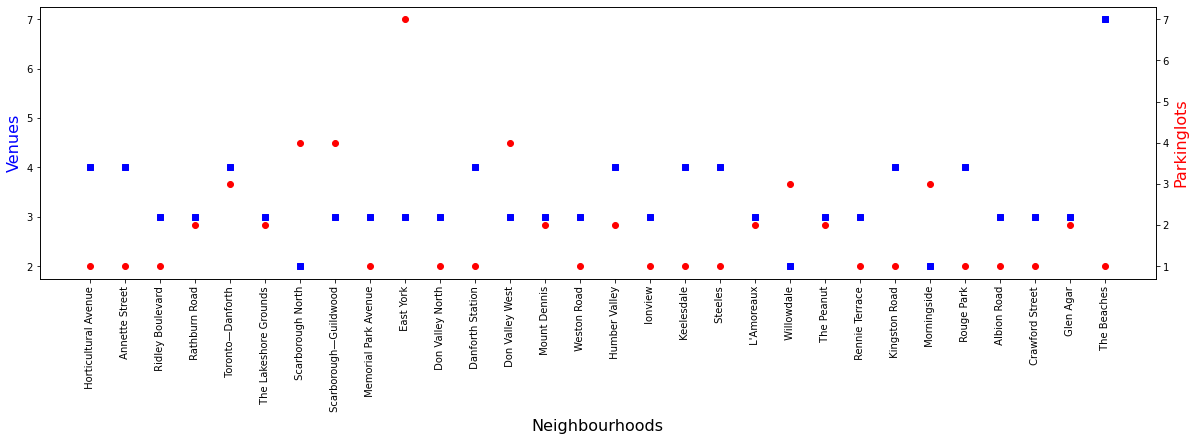

In [195]:
plt.figure(figsize=(20, 5))



plt.scatter(x = Cl_4['name'], y = Cl_4['no of venues'], c="b", marker= "s")
plt.xticks(rotation=90)
plt.xlabel("Neighbourhoods", fontsize= 16)
plt.ylabel("Venues", c="b", fontsize= 16)

ax2= plt.twinx()
ax2.scatter(x = Cl_4['name'], y = Cl_4['no of parking lots'], c="r", marker= "o")
plt.ylabel("Parkinglots", c="r", fontsize= 16)

plt.show()

### Cluster 4:
#### Fetures are scaling between for Venues 2 to 7 and Parkinglots 1 to 7
-----
Apart from all the neighbourhoods in this category `The beaches` shows variance of one Parkinglot for 7 Venues. This will the perfect place to advise our client basing the complete analysis.

### Final- Shortlist:
------------

|Neighbourhood|Venues|Parkinglots|
|---|---|---|
|Horticultural Avenue|4|1|
|Annette Street|4|1|
|Danforth Station|4|1|
|Keelesdale|4|1|
|Steeles|4|1|
|Kingston Road|4|1|
|Rouge Park|4|1|
|Old toronto|16|10|
|Humber river- Black creek|17|9|
|Parkdale- High park|26|10|
|The Beaches|7|1|

In [331]:
#writing all the Neighbourhood names from final short list in a list object
n = ["Horticultural Avenue","Annette Street", "Danforth Station", "Keelesdale", "Steeles", "Kingston Road", 
             "Rouge Park", "Old toronto", "Humber river- Black creek", "Parkdale- High park","The Beaches"]
v = [4,4,4,4,4,4,4,16,17,26,7]
p = [1,1,1,1,1,1,1,10,9,10,1]


In [332]:
#creating a new df with dff, 
dff= pd.DataFrame({
    "Neighbourhood":n,
    "Venues":v,
    "Parkinglots":p   
})
dff

,Neighbourhood,Venues,Parkinglots
0,Horticultural Avenue,4,1
1,Annette Street,4,1
2,Danforth Station,4,1
3,Keelesdale,4,1
4,Steeles,4,1
5,Kingston Road,4,1
6,Rouge Park,4,1
7,Old toronto,16,10
8,Humber river- Black creek,17,9
9,Parkdale- High park,26,10


In [333]:
dff_latitude= []
dff_longitude= []

for i in dff['Neighbourhood']:

    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(f'{i}, Ontario')
    dff_latitude.append(location.latitude)
    dff_longitude.append(location.longitude)

print(dff_latitude)
print(dff_longitude)

[43.6611263, 43.6585038, 43.6864103, 43.6901578, 43.8161778, 43.7831638, 43.8045003, 43.6534817, 43.7337368, 43.6499649, 43.6710244]
[-79.3749199, -79.4870628, -79.2957899, -79.4749985, -79.3145378, -79.1693282, -79.1580323, -79.3839347, -79.5382285, -79.473014, -79.296712]


In [334]:
dff['Latitude'] = dff_latitude
dff['Longitude'] = dff_longitude
dff

,Neighbourhood,Venues,Parkinglots,Latitude,Longitude
0,Horticultural Avenue,4,1,43.661126,-79.374920
1,Annette Street,4,1,43.658504,-79.487063
2,Danforth Station,4,1,43.686410,-79.295790
3,Keelesdale,4,1,43.690158,-79.474998
4,Steeles,4,1,43.816178,-79.314538
5,Kingston Road,4,1,43.783164,-79.169328
6,Rouge Park,4,1,43.804500,-79.158032
7,Old toronto,16,10,43.653482,-79.383935
8,Humber river- Black creek,17,9,43.733737,-79.538229
9,Parkdale- High park,26,10,43.649965,-79.473014


In [348]:
address = 'Downtown Toronto, Toronto, Ontario' # giving Toronto 

geolocator = Nominatim(user_agent="ny_explorer")
loccation = geolocator.geocode(address)
lat = loccation.latitude
lon = loccation.longitude

map_clusters = folium.Map(location=[lat, lon], zoom_start=10)

markers_colors = []
for lat, lon, poi, v, n in zip(dff['Latitude'], dff['Longitude'], dff['Neighbourhood'], dff['Venues'], dff['Parkinglots']):
    label = folium.Popup(f'{poi} with {v} venues and {n} parkinglots', parse_html=True)
    if n >= 10:
       
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            #fill_color='#15B01A',
            fill_opacity=0.8,
            parse_html=False).add_to(map_clusters)
    
    else:
        folium.CircleMarker(
            [lat, lon], 
            radius=5,
            popup=label,
            fill=True,
            fill_opacity=0.7).add_to(map_clusters)

       
map_clusters

#### Short Overview:
----

|Color|Representation|
|---|---|
|Blue|Neighbourhoods with Parkinglots less than 10|
|Red|Neighbourhoods with Parkinglots 10 or more|

In the above Map of Toronto city, there are two neighbourhoods marked in red among 11. One is 'Parkdale- High park' which has 26 venues and 10 parkinglots, on the other hand 'Old Toronto' which has 16 venues and 10 parkinglots. After observing these two places they have gap between numbers of venues and parkinglots. In my opinion they are most feasable neighbourhoods at this point and they are located in the center on the city, where we get most of the crowd.

### Conclusion:
----------
As we went through all the available data and analysis to filter the most suitable enighbourhood for a new parkinglot facility establishment there are some specifics to point out. The CSV file we used for this capstone project has no current data, information was gathered in year 2016(we can't really on this final results if we want to use it for todays scenario) and we only used the parkinglots which are available for public access. 
Going further we have successfully shortlisted 11 possible neighbourhoods to have a new parkinglot finally. But, these are only the statistics we have it on the table for now. Next step would be analyzing the available spaces and local authorities approval.